Random Forest Classifier

Enter a tweet: hii murder you
No offensive labels predicted for this tweet
Accuracy: 0.9007878221391374
Precision: 0.8549511854951185
Recall: 0.353110599078341
F1 Score: 0.4997961679576029
Classification Report:
                precision    recall  f1-score   support

identity_hate       1.00      0.02      0.03        60
       insult       0.80      0.39      0.52       372
      obscene       0.92      0.47      0.62       424
 severe_toxic       0.53      0.08      0.14        98
       threat       0.00      0.00      0.00        26
        toxic       0.86      0.35      0.49       756

    micro avg       0.85      0.35      0.50      1736
    macro avg       0.69      0.22      0.30      1736
 weighted avg       0.84      0.35      0.49      1736
  samples avg       0.03      0.03      0.03      1736

Confusion Matrix for identity_hate:
 [[7429    0]
 [  59    1]]
Confusion Matrix for insult:
 [[7080   37]
 [ 228  144]]
Confusion Matrix for obscene:
 [[7047   18]
 [ 226  198]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


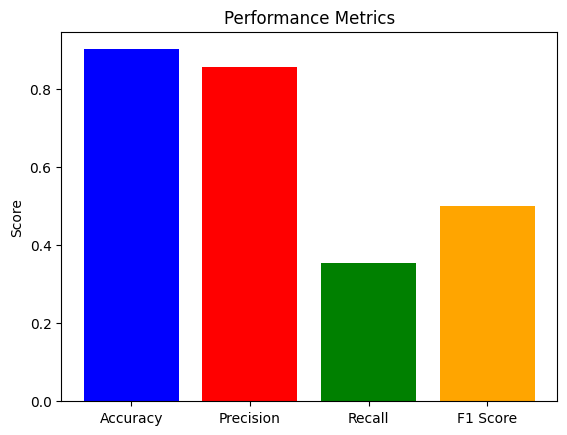

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, classification_report

# Load the dataset from a CSV file
data = pd.read_csv("train_preprocessed.csv")

# Remove rows with missing labels from y and X_tfidf
data = data.dropna(subset=['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic'])

# Assuming 'data' is your dataset
X = data['comment_text']
y = data[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']]

# Sample TF-IDF vectorizer for demonstration purposes
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Reduced max_features
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Dimensionality reduction using TruncatedSVD
n_components = 100  # Adjust the number of components
svd = TruncatedSVD(n_components=n_components)
X_tfidf = svd.fit_transform(X_tfidf)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Sample model training (reduce the number of estimators)
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)  # Reduced n_estimators

# Train the model
rf_model.fit(X_train, y_train)

# Input a tweet from the user
user_tweet = input("Enter a tweet: ")

# Preprocess and vectorize the user's tweet
user_tweet_tfidf = tfidf_vectorizer.transform([user_tweet])
user_tweet_tfidf = svd.transform(user_tweet_tfidf)

# Make predictions
predictions = rf_model.predict(user_tweet_tfidf)

# Map the label names to the predicted labels
label_names = ['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']
predicted_labels = [label_names[i] for i, prediction in enumerate(predictions[0]) if prediction == 1]

# Print the predicted labels
if predicted_labels:
    print("Predicted Labels: ", predicted_labels)
else:
    print("No offensive labels predicted for this tweet")

# Calculate accuracy on the entire test set
accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rf_model.predict(X_test), average='micro')
recall = recall_score(y_test, rf_model.predict(X_test), average='micro')
f1 = f1_score(y_test, rf_model.predict(X_test), average='micro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Classification Report
classification_rep = classification_report(y_test, rf_model.predict(X_test), target_names=label_names)
print("Classification Report:\n", classification_rep)

# Confusion Matrix
conf_matrix = multilabel_confusion_matrix(y_test, rf_model.predict(X_test))
for i, label in enumerate(label_names):
    print(f"Confusion Matrix for {label}:\n", conf_matrix[i])

# Visualization
# Plot precision, recall, and F1-score
# Visualization
import matplotlib.pyplot as plt

# Insert the accuracy value to match the metrics list
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
ax.bar(metrics, values, color=['blue', 'red', 'green', 'orange'])
ax.set_ylabel('Score')
ax.set_title('Performance Metrics')
plt.show()


### SVM

Training time: 5.280550479888916 seconds
Enter a tweet: fuck u
This tweet is bad.
Predicted Labels:  ['insult', 'obscene', 'toxic']
Accuracy: 0.8969072164948454
Precision: 0.9
Recall: 0.32142857142857145
F1 Score: 0.4736842105263158
Classification Report:
                precision    recall  f1-score   support

identity_hate       0.00      0.00      0.00         2
       insult       0.69      0.32      0.44        28
      obscene       1.00      0.46      0.63        28
 severe_toxic       0.00      0.00      0.00         6
       threat       0.00      0.00      0.00         0
        toxic       1.00      0.29      0.45        48

    micro avg       0.90      0.32      0.47       112
    macro avg       0.45      0.18      0.25       112
 weighted avg       0.85      0.32      0.46       112
  samples avg       0.03      0.03      0.03       112



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Confusion Matrix for identity_hate:
 [[483   0]
 [  2   0]]
Confusion Matrix for insult:
 [[453   4]
 [ 19   9]]
Confusion Matrix for obscene:
 [[457   0]
 [ 15  13]]
Confusion Matrix for severe_toxic:
 [[479   0]
 [  6   0]]
Confusion Matrix for threat:
 [[485   0]
 [  0   0]]
Confusion Matrix for toxic:
 [[437   0]
 [ 34  14]]


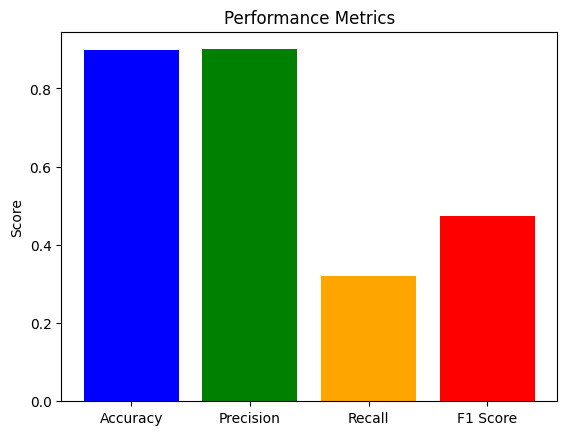

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
import joblib
import time
from sklearn.metrics import multilabel_confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
data = pd.read_csv("train_preprocessed.csv")

# Remove rows with missing labels from y and X_tfidf
data = data.dropna(subset=['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic'])

# Assuming 'data' is your dataset
X = data['comment_text']
y = data[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']]

# Sample TF-IDF vectorizer for demonstration purposes
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Reduced max_features
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Dimensionality reduction using TruncatedSVD
n_components = 100  # Adjust the number of components
svd = TruncatedSVD(n_components=n_components)
X_tfidf = svd.fit_transform(X_tfidf)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Sample model training (adjust SVM parameters)
svm_model = MultiOutputClassifier(SVC(C=1.0, kernel='linear', probability=True, random_state=42))

# Train the SVM model
start_time = time.time()
svm_model.fit(X_train, y_train)
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")

# Input a tweet from the user
user_tweet = input("Enter a tweet: ")

# Preprocess and vectorize the user's tweet
user_tweet_tfidf = tfidf_vectorizer.transform([user_tweet])
user_tweet_tfidf = svd.transform(user_tweet_tfidf)

# Make binary classification (bad/ok) prediction
binary_prediction = svm_model.predict(user_tweet_tfidf)
if binary_prediction.any() == 1:
    print("This tweet is bad.")
else:
    print("This tweet is okay.")

# Make multi-label classification prediction
multi_label_prediction = svm_model.predict(user_tweet_tfidf)
label_names = ['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']
predicted_labels = [label_names[i] for i, prediction in enumerate(multi_label_prediction[0]) if prediction == 1]

# Print the predicted labels
if predicted_labels:
    print("Predicted Labels: ", predicted_labels)
else:
    print("No specific offensive labels predicted for this tweet.")

# Calculate and print accuracy, precision, recall, and F1 score on the entire test set
accuracy = accuracy_score(y_test, svm_model.predict(X_test))
precision = precision_score(y_test, svm_model.predict(X_test), average='micro')
recall = recall_score(y_test, svm_model.predict(X_test), average='micro')
f1 = f1_score(y_test, svm_model.predict(X_test), average='micro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Classification Report
classification_rep = classification_report(y_test, svm_model.predict(X_test), target_names=label_names)
print("Classification Report:\n", classification_rep)

# Confusion Matrix
conf_matrix = multilabel_confusion_matrix(y_test, svm_model.predict(X_test))
for i, label in enumerate(label_names):
    print(f"Confusion Matrix for {label}:\n", conf_matrix[i])

# Visualizations
# Plot precision, recall, and F1-score
fig, ax = plt.subplots()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
ax.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
ax.set_ylabel('Score')
ax.set_title('Performance Metrics')
plt.show()


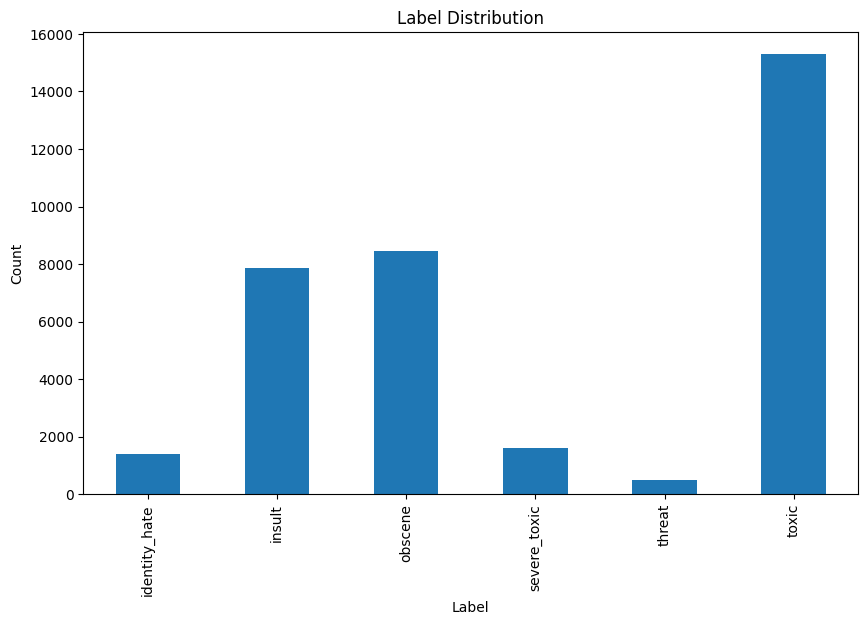

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
train_data = pd.read_csv("train_preprocessed.csv")

# Plot the distribution of specific labels
label_counts = train_data[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']].sum()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()